[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/regression-boston-housing.ipynb)

# Boston Housing Price Prediction --  Regression

## Check Tensorflow Version

In [0]:
import tensorflow as tf

In [60]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [61]:
tf.__version__

'1.9.0-rc2'

## Imports

In [0]:
from tensorflow import keras
from tensorflow.python.keras.datasets import boston_housing
from tensorflow.python.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Load Boston Housing Dataset

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [64]:
train_data.shape

(404, 13)

In [65]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [66]:
train_targets.shape

(404,)

In [67]:
train_targets[0]

15.2

In [68]:
test_data.shape

(102, 13)

## Data Preparation

### Normalize Train and Test Data

In [0]:
mean = train_data.mean()
std = train_data.std()

In [0]:
train_data -= mean
train_data /= std

In [0]:
test_data -= mean
test_data /= std

## Model

In [0]:
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])
  return model

## K-fold validation

In [0]:
k = 4

In [0]:
n_val_samples = len(train_data) // k

In [0]:
epochs = 500

In [0]:
keras.backend.clear_session()

In [77]:
mae_histories = []

for i in range(k):
  
  print('Executing Fold:', i)
 
  val_data = train_data[i * n_val_samples: (i+1) * n_val_samples]
  val_targets = train_targets[i * n_val_samples: (i+1) * n_val_samples]
  
  train_data_set = np.concatenate(
      [train_data[:i * n_val_samples],
      train_data[(i+1) * n_val_samples:]]
  )
  
  train_targets_set = np.concatenate(
    [train_targets[:i * n_val_samples],
    train_targets[(i+1) * n_val_samples:]]
  )
  
  model = create_model()
  history = model.fit(train_data_set,
              train_targets_set,
              validation_data=(val_data, val_targets),
              epochs=epochs,
              batch_size=1,
              verbose=0
            )
  mae_history = history.history['val_mean_absolute_error']
  mae_histories.append(mae_history)

Executing Fold: 0
Executing Fold: 1
Executing Fold: 2
Executing Fold: 3


In [81]:
len(mae_histories)

4

In [0]:
mean_maes = [
    np.mean([mae[e] for mae in mae_histories]) for e in range(epochs)
]

## Plot Validation MAE

Text(0,0.5,'Validation MAE Score')

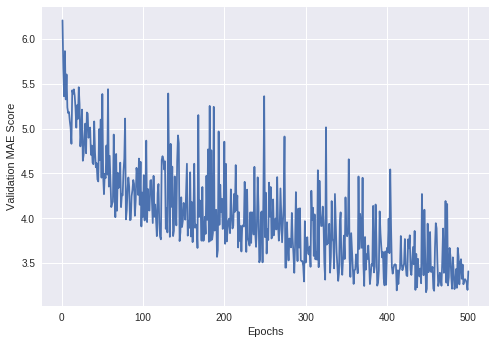

In [83]:
plt.plot(range(1, len(mean_maes)+1), mean_maes)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE Score')

In [0]:
# Plot the validation mae using EMA (exponential moving average) to visualize the changes in the recent epochs
def ema(points, factor):
  ema_points = []
  for point in points:
    if ema_points:
      previous = ema_points[-1]
      ema_points.append(previous * factor + point * (1 - factor))
    else:
      ema_points.append(point)

  return ema_points
    

In [0]:
ema_maes = ema(mean_maes, 0.9)

Text(0,0.5,'EMA Validation MAE Score')

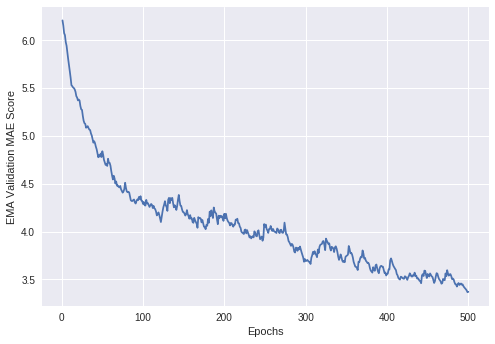

In [89]:
plt.plot(range(1, len(ema_maes)+1), ema_maes)
plt.xlabel('Epochs')
plt.ylabel('EMA Validation MAE Score')

## Train the model and evaluate it



In [94]:
model = create_model()
model.fit(
    train_data,
    train_targets,
    epochs=500,
    batch_size=16,
    verbose=0
)
test_mse, test_mae = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 854us/step


In [95]:
test_mae

3.9579489558350804

In [96]:
test_mse

32.95947063670439